# Regresja Liniowa
Metoda polega ta na dopasowaniu parametrów modelów tak, aby ten najelpiej szacował daną wartość. <br/>
Przyjmymi, że chcielbyśmy wyznaczyć korelację pomiędzy doświadczniem, a zarobkami na rynku pracy w sektorze IT. W tym celu posłużymy się modelem funkcji liniowej.


### Funkcja Liniowa
W tym przykładzie skupimy się na znanej wszystkim funkcji liniowej: <br/>

$$
y = ax + b 
$$

<br/>

Na początku wygenerujmy przykładowe dane testowe posługująć się równaniem:
$$
y = ax + b + e
$$
Gdzie e będzie odchyleniem wprowadzającym losowość do naszych danych. <br/>
W tym przykładzie:
- Przyjmiemy z góry poszukiwane paramtery a i b
- na ich podstawie wygenerujemy dane na podstawie, których nauczymy nasz model
- przejdziemy proces nauki modelu

### Import potrzbnych bibliotek

In [1]:
import numpy as np
from src.regression_back import figure1

## Generowanie danych
Za parametry modelu przyjmiemy sobie:
a = 2 oraz b = 5 na ich podstawie wygenerujemy przykładowe dane dodających do nich losowe odchylenie e 

In [2]:
true_a = 2
true_b = 5
N = 100


np.random.seed(42) # W trackie projektów związanych z uczeniem maszynowym przyjmujemy jedno ziarno generatora liczb pseudolosowych

x = 10*np.random.rand(N, 1)
e = 2 * np.random.randn(N, 1)
y = true_a * x + true_b + e

### Podział danych na dane treningowe i walidacyjne
Na podstawie danych treningowych model się uczy, natomiast na danych walidacyjnch model sprawdza swoją poprawność

In [3]:
# mieszanie daych
idx = np.arange(N)
np.random.shuffle(idx)

# 80% danych do uczenia
train_idx = idx[: int(N * 0.8)]
# 20% do walidacj
val_idx = idx[int(N * 0.8) :]

# podział na zbiory uczący i walidacyjny
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


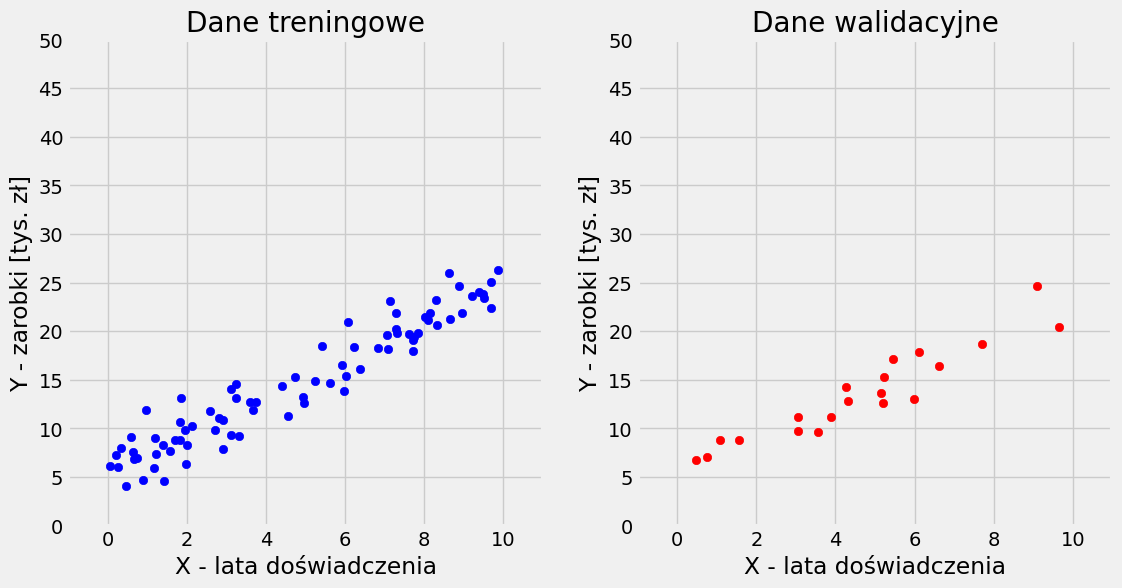

In [4]:
figure1(x_train, y_train, x_val, y_val)

# Nauka modelu - dopasowanie parametrów
W tym momencie zapominaym o wartościach a i b, których użyliśmy do stworzenia danych. Przejdziemy przez prcoes dopasowania parmaetrów modelu na podstawie dostępnych danych

### 0. Ustawienie parametrów a i b na losowe
Ponieważ losowe parametry są dobre jak każde inne


In [6]:
a = np.random.randn(1)
b = np.random.randn(1)

print(f"Początkowe a: {a}, b: {b}")

Początkowe a: [-0.66178646], b: [0.85243333]


### 1. Obliczenie oszacowania modelu


### 2. Obliczenie funkcji stary
Funkcja stary mówi nam jak duży błąd popełnia nasz model.<br/> W tym przykładzie posłużymy się funkcją straty Błędu środkokwadratowego (ang. Mean Square Error - MSE)